In [215]:
from helpers import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pmdarima as pm

sns.set_theme()

In [216]:

from statsmodels.tools.sm_exceptions import  ValueWarning
import warnings

warnings.simplefilter(action = 'ignore', category = ValueWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [217]:
df = pd.read_csv('prepared_data.csv',parse_dates=['Date'])

In [218]:
df_coffee = df.loc[df['Product']=='Coffee',['Date','Quantity']].reset_index(drop=True)
df_tea = df.loc[df['Product']=='Tea',['Date','Quantity']].reset_index(drop=True)

## Functions

In [219]:
def time_lag(df, lagged_qty, steps = 1, season = None):

    for step in range(steps):
        df[f't-{step+1}'] = df[lagged_qty].shift(step+1)
    
    if season != None:

        df[f'S({season})'] = df[lagged_qty].shift(season)

In [220]:
def acf_pacf(series, title = 'Autocorrelations'):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8),sharex=True)
    fig.suptitle(title)
    # Make ACF plot
    plot_acf(series.dropna(), lags=10, zero=False, ax=ax1)
    # Make PACF plot
    plot_pacf(series.dropna(), lags=10, zero=False, ax=ax2)

    ax2.set_xlabel('Lags')
    plt.tight_layout()
    plt.show()

## Coffee

### EDA

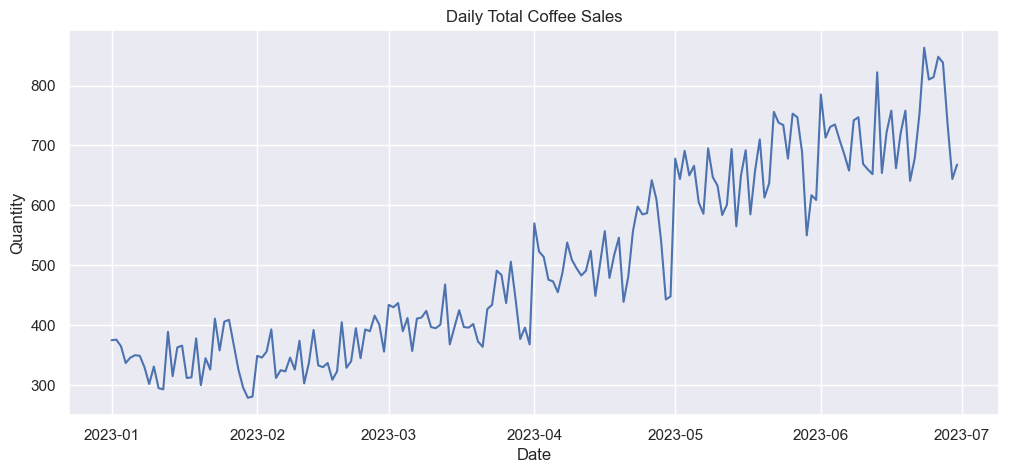

In [221]:
plt.figure(figsize= (12,5))
sns.lineplot(data=df_coffee, x='Date', y='Quantity').set(title = 'Daily Total Coffee Sales')
plt.show()

In [222]:
df_coffee

,Date,Quantity
0,2023-01-01,375
1,2023-01-02,376
2,2023-01-03,365
3,2023-01-04,337
4,2023-01-05,346
...,...,...
176,2023-06-26,848
177,2023-06-27,838
178,2023-06-28,734
179,2023-06-29,644


In [223]:
trend_stationary(df_coffee,'Quantity')

ADF statistic is 0.89
the p-value of this series is 0.99 and is therefore not stationary.
We cannot reject the null hypothesis of a unit root


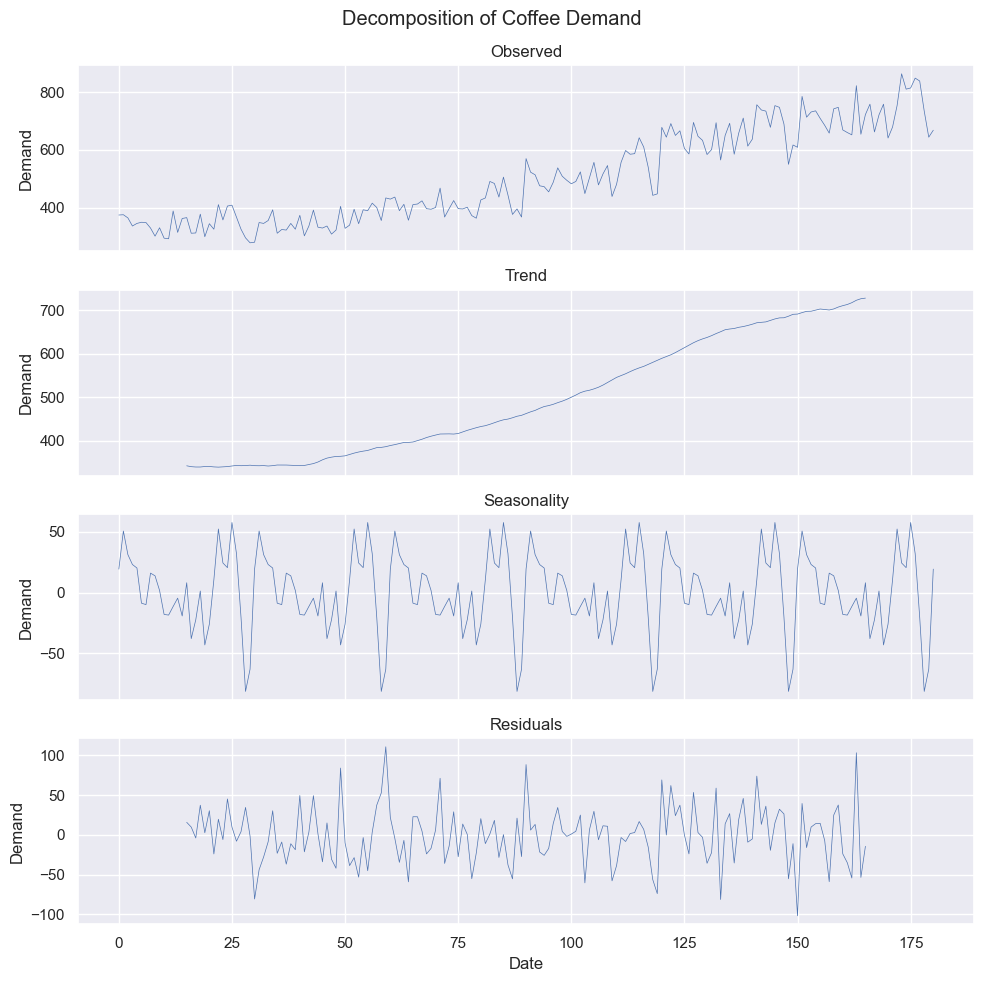

In [224]:
time_series_decomposition(df_coffee['Quantity'], plot_title= 'Decomposition of Coffee Demand', plot_y= "Demand")

[Text(0.5, 1.0, 'Rolling 30 Day Mean and Standard Deviation'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Quantity')]

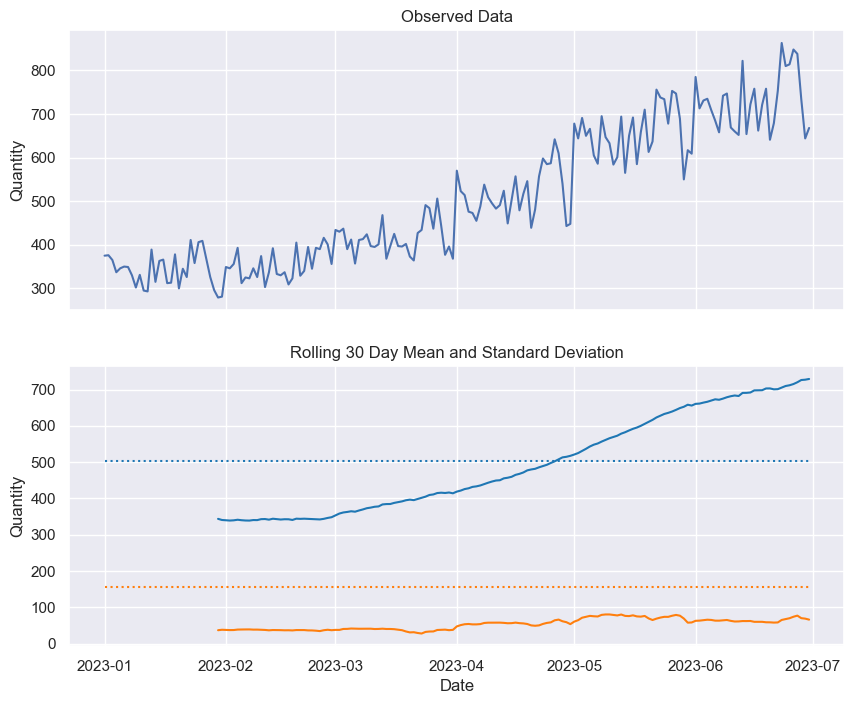

In [225]:
df_coffee_stat = df_coffee.copy()

df_coffee_stat['rolling mean'] = df_coffee['Quantity'].rolling(window=30).mean()
df_coffee_stat['rolling std'] = df_coffee['Quantity'].rolling(window=30).std()
df_coffee_stat['overall_mean'] = df_coffee['Quantity'].mean()
df_coffee_stat['overall_std'] = df_coffee['Quantity'].std()

tb_blue = '#1f77b4'
tb_orange = '#ff7f0e'

fig, axes= plt.subplots(2,1, figsize=(10, 8),sharex=True)

sns.lineplot(data=df_coffee_stat, x='Date',y='Quantity',errorbar=None, ax=axes[0])
sns.lineplot(df_coffee_stat,x='Date', y='rolling mean',errorbar=None,ax=axes[1],color=tb_blue)
sns.lineplot(df_coffee_stat,x='Date', y='rolling std',errorbar=None,ax=axes[1],color=tb_orange)
sns.lineplot(df_coffee_stat,x='Date',y='overall_mean',errorbar=None,ax=axes[1],linestyle = ':',color=tb_blue)
sns.lineplot(df_coffee_stat,x='Date',y='overall_std',errorbar=None,ax=axes[1],linestyle = ':',color= tb_orange)
             
axes[0].set(title = 'Observed Data',
       xlabel = 'Date',
       ylabel='Quantity')
#axes[0].set_ylim(-1.5,1.5)

axes[1].set(title = 'Rolling 30 Day Mean and Standard Deviation',
       xlabel = 'Date',
       ylabel='Quantity')
#axes[1].legend(loc="upper left", labels=[ "Rolling Mean", "Rolling Std Dev"])
#axes[1].set_ylim(-1.5,1.5)

#sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))


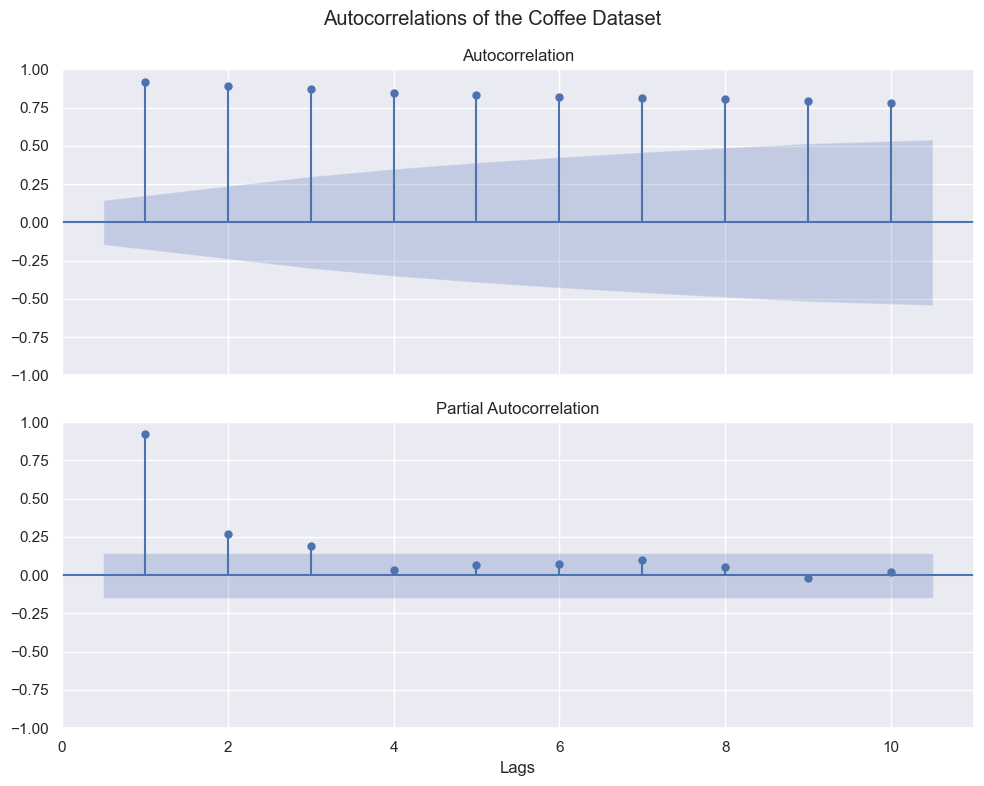

In [226]:
acf_pacf(df_coffee['Quantity'],"Autocorrelations of the Coffee Dataset")

In [227]:
df_coffee_stationary = df_coffee.copy()
df_coffee_stationary['Difference'] = df_coffee_stationary['Quantity'].diff()
df_coffee_stationary

,Date,Quantity,Difference
0,2023-01-01,375,NaN
1,2023-01-02,376,1.0
2,2023-01-03,365,-11.0
3,2023-01-04,337,-28.0
4,2023-01-05,346,9.0
...,...,...,...
176,2023-06-26,848,34.0
177,2023-06-27,838,-10.0
178,2023-06-28,734,-104.0
179,2023-06-29,644,-90.0


In [228]:
trend_stationary(df_coffee_stationary.dropna(),'Difference')

ADF statistic is -6.15
the p-value of this series is 0.00 and is therefore stationary.
We can reject at 99% confidence


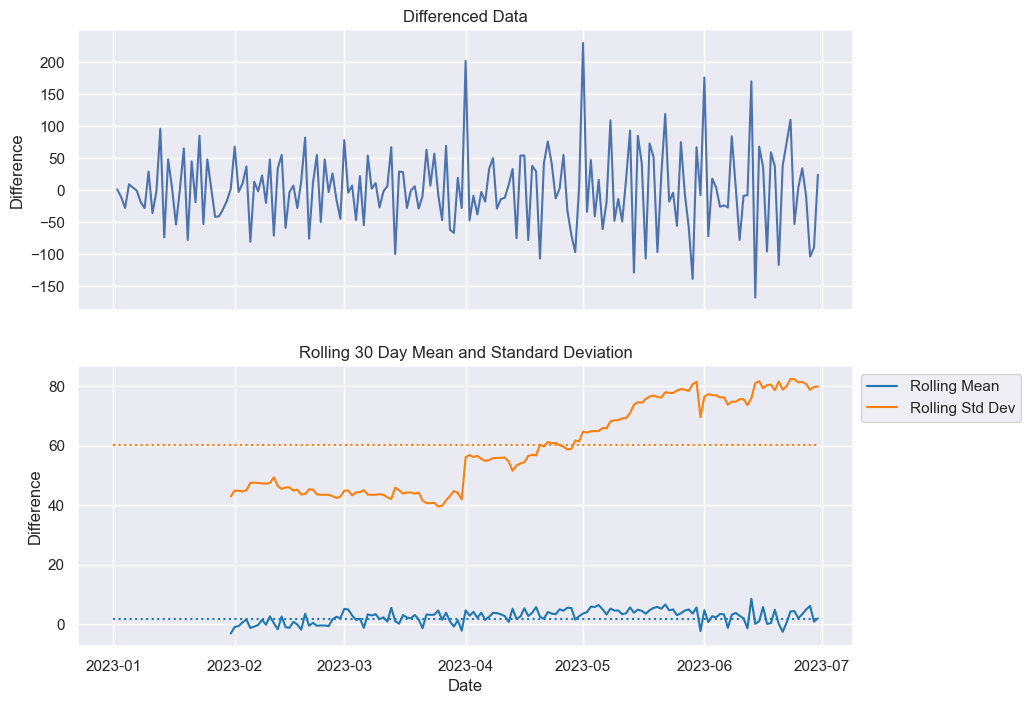

In [229]:
df_coffee_stat = df_coffee_stationary.copy()

df_coffee_stat['rolling mean'] = df_coffee_stationary['Difference'].rolling(window=30).mean()
df_coffee_stat['rolling std'] = df_coffee_stationary['Difference'].rolling(window=30).std()
df_coffee_stat['overall_mean'] = df_coffee_stationary['Difference'].mean()
df_coffee_stat['overall_std'] = df_coffee_stationary['Difference'].std()

tb_blue = '#1f77b4'
tb_orange = '#ff7f0e'

fig, axes= plt.subplots(2,1, figsize=(10, 8),sharex=True)

sns.lineplot(data=df_coffee_stat, x='Date',y='Difference',errorbar=None, ax=axes[0])
sns.lineplot(df_coffee_stat,x='Date', y='rolling mean',errorbar=None,ax=axes[1],color=tb_blue)
sns.lineplot(df_coffee_stat,x='Date', y='rolling std',errorbar=None,ax=axes[1],color=tb_orange)
sns.lineplot(df_coffee_stat,x='Date',y='overall_mean',errorbar=None,ax=axes[1],linestyle = ':',color=tb_blue)
sns.lineplot(df_coffee_stat,x='Date',y='overall_std',errorbar=None,ax=axes[1],linestyle = ':',color= tb_orange)
             
axes[0].set(title = 'Differenced Data',
       xlabel = 'Date',
       ylabel='Difference')
#axes[0].set_ylim(-1.5,1.5)

axes[1].set(title = 'Rolling 30 Day Mean and Standard Deviation',
       xlabel = 'Date',
       ylabel='Difference')
axes[1].legend(loc="upper left", labels=[ "Rolling Mean", "Rolling Std Dev"])
#axes[1].set_ylim(-1.5,1.5)

sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))

The ACF and PACF plots indicate an MA(1) model or ARIMA(0,1,1) since we took a single difference. An AR(1) model may not be appropriate

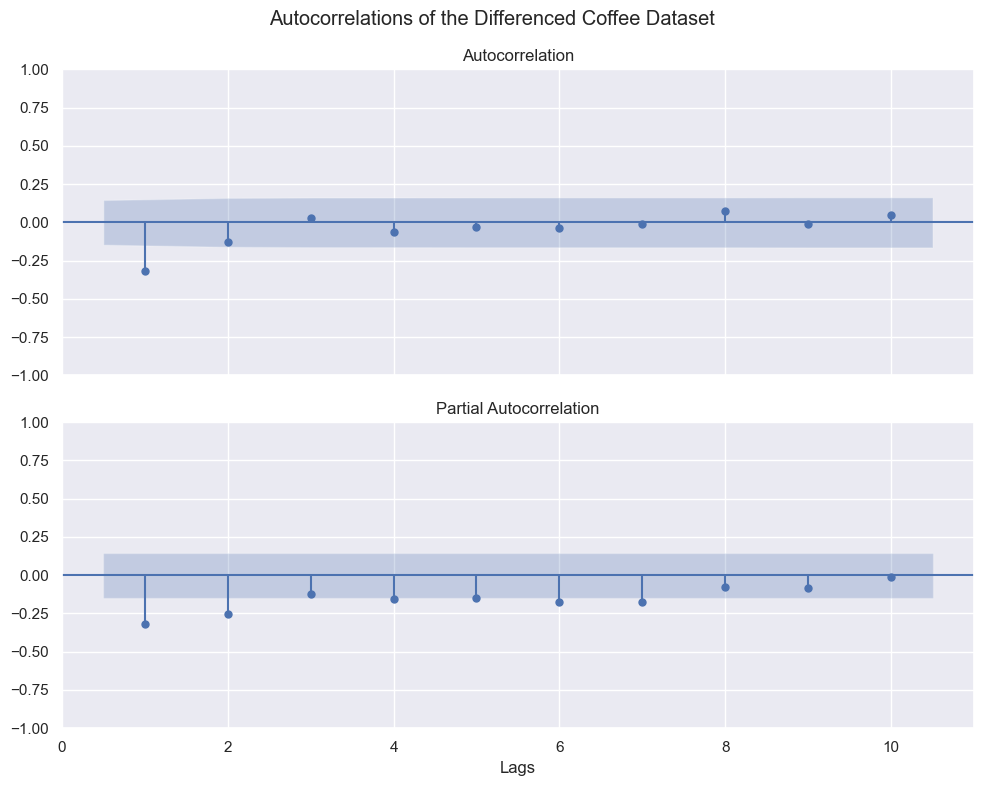

In [230]:
acf_pacf(df_coffee_stationary['Difference'],"Autocorrelations of the Differenced Coffee Dataset")

### Model Development

In [231]:
df_coffee_model_dev = df_coffee_stationary.copy()
time_lag(df_coffee_model_dev,'Difference',steps=30)

df_coffee_model_dev = df_coffee_model_dev.dropna().reset_index(drop=True)

df_coffee_train = df_coffee_model_dev[df_coffee_model_dev['Date'] <= '2023-05-31']
df_coffee_test = df_coffee_model_dev[df_coffee_model_dev['Date'] >= '2023-06-01']

df_coffee_train.head()

,Date,Quantity,Difference,t-1,t-2,t-3,t-4,t-5,t-6,t-7,...,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29,t-30
0,2023-02-01,349,68.0,2.0,-17.0,-30.0,-41.0,-42.0,3.0,48.0,...,-36.0,29.0,-28.0,-19.0,-1.0,4.0,9.0,-28.0,-11.0,1.0
1,2023-02-02,346,-3.0,68.0,2.0,-17.0,-30.0,-41.0,-42.0,3.0,...,-2.0,-36.0,29.0,-28.0,-19.0,-1.0,4.0,9.0,-28.0,-11.0
2,2023-02-03,356,10.0,-3.0,68.0,2.0,-17.0,-30.0,-41.0,-42.0,...,96.0,-2.0,-36.0,29.0,-28.0,-19.0,-1.0,4.0,9.0,-28.0
3,2023-02-04,393,37.0,10.0,-3.0,68.0,2.0,-17.0,-30.0,-41.0,...,-74.0,96.0,-2.0,-36.0,29.0,-28.0,-19.0,-1.0,4.0,9.0
4,2023-02-05,312,-81.0,37.0,10.0,-3.0,68.0,2.0,-17.0,-30.0,...,48.0,-74.0,96.0,-2.0,-36.0,29.0,-28.0,-19.0,-1.0,4.0


In [232]:
target = df_coffee_train['Difference']
features = df_coffee_train[['t-1' ,'t-2' ,'t-3' ,'t-4' ,'t-5' ,'t-6' ,'t-7' ,'t-8' ,'t-9' ,'t-10',
                            't-11','t-12','t-13','t-14','t-15','t-16','t-17','t-18','t-19','t-20',
                            't-21','t-22','t-23','t-24','t-25','t-26','t-27','t-28','t-29','t-30']]

features = sm.add_constant(features)

mlr_coffee_model = sm.OLS(target,features).fit()
mlr_coffee_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Difference   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     3.632
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.28e-06
Time:                        23:58:18   Log-Likelihood:                -610.94
No. Observations:                 120   AIC:                             1284.
Df Residuals:                      89   BIC:                             1370.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1770      7.315      2.348      0.021       2.643      31.711
t-1           -0.5946      0.106     -5.631      0.000      -0.804      -0.385
t-2           -0.5972      0.115     -5.175      0.000      -0.826      -0.368
t-3           -0.4731      0.128     -3.700      0.000      -0.727      -0.219
t-4           -0.5008      0.136     -3.683      0.000      -0.771      -0.231
t-5           -0.5053      0.144     -3.504      0.001      -0.792      -0.219
t-6           -0.3930      0.153     -2.573      0.012      -0.696      -0.089
t-7           -0.2769      0.158     -1.753      0.083      -0.591       0.037
t-8           -0.2354      0.160     -1.473      0.144      -0.553       0.082
t-9           -0.1638      0.162     -1.013      0.314      -0.485       0.157
t-10          -0.1950      0.164     -1.186      0.239      -0.522       0.132
t-11          -0.1203      0.167     -0.720      0.473      -0.452       0.212
t-12           0.0638      0.168      0.381      0.704      -0.269       0.397
t-13          -0.2054      0.169     -1.215      0.228      -0.541       0.131
t-14           0.0106      0.172      0.061      0.951      -0.332       0.353
t-15           0.0290      0.172      0.168      0.867      -0.313       0.371
t-16           0.0318      0.172      0.185      0.854      -0.311       0.374
t-17           0.1175      0.172      0.682      0.497      -0.225       0.460
t-18           0.0622      0.173      0.360      0.719      -0.281       0.405
t-19           0.0615      0.171      0.360      0.720      -0.278       0.401
t-20           0.1079      0.171      0.630      0.530      -0.232       0.448
t-21           0.0375      0.172      0.218      0.828      -0.304       0.379
t-22           0.0706      0.173      0.408      0.684      -0.273       0.414
t-23          -0.0371      0.172     -0.216      0.829      -0.378       0.304
t-24          -0.2469      0.169     -1.465      0.146      -0.582       0.088
t-25           0.0010      0.166      0.006      0.995      -0.329       0.331
t-26          -0.2307      0.155     -1.488      0.140      -0.539       0.077
t-27          -0.2438      0.146     -1.670      0.098      -0.534       0.046
t-28          -0.4801      0.136     -3.519      0.001      -0.751      -0.209
t-29          -0.4423      0.129     -3.416      0.001      -0.700      -0.185
t-30          -0.0024      0.118     -0.020      0.984      -0.236       0.232
==============================================================================
Omnibus:                       12.458   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.696
Skew:                           0.675   Prob(JB):                      0.00106
Kurtosis:                       3.956   Cond. No.                         146.
==

In [233]:
target = df_coffee_train['Difference']
features = df_coffee_train[['t-1' ,'t-2' ,'t-3' ,'t-4' ,'t-5' ,'t-6' ,'t-7' ,'t-28','t-29']]

features = sm.add_constant(features)

mlr_coffee_model_9lag = sm.OLS(target,features).fit()
mlr_coffee_model_9lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Difference   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     8.806
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           6.93e-10
Time:                        23:58:18   Log-Likelihood:                -626.35
No. Observations:                 120   AIC:                             1273.
Df Residuals:                     110   BIC:                             1301.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6597      4.494      2.817      0.006       3.754      21.566
t-1           -0.6373      0.089     -7.153      0.000      -0.814      -0.461
t-2           -0.6137      0.095     -6.452      0.000      -0.802      -0.425
t-3           -0.4258      0.106     -3.998      0.000      -0.637      -0.215
t-4           -0.4755      0.104     -4.570      0.000      -0.682      -0.269
t-5           -0.4185      0.107     -3.928      0.000      -0.630      -0.207
t-6           -0.2827      0.098     -2.897      0.005      -0.476      -0.089
t-7           -0.1617      0.089     -1.811      0.073      -0.339       0.015
t-28          -0.3557      0.087     -4.068      0.000      -0.529      -0.182
t-29          -0.3244      0.091     -3.569      0.001      -0.505      -0.144
==============================================================================
Omnibus:                        2.946   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                2.968
Skew:                           0.367   Prob(JB):                        0.227
Kurtosis:                       2.763   Cond. No.                         78.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
features = df_coffee_train[['t-1','t-2','t-3']]

features = sm.add_constant(features)

mlr_coffee_model_3lag = sm.OLS(target,features).fit()
mlr_coffee_model_3lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Difference   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     8.624
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           3.25e-05
Time:                        23:58:18   Log-Likelihood:                -646.83
No. Observations:                 120   AIC:                             1302.
Df Residuals:                     116   BIC:                             1313.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0195      4.958      1.012      0.313      -4.800      14.839
t-1           -0.4217      0.092     -4.570      0.000      -0.604      -0.239
t-2           -0.3466      0.095     -3.659      0.000      -0.534      -0.159
t-3           -0.1206      0.094     -1.276      0.204      -0.308       0.067
==============================================================================
Omnibus:                        8.824   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               14.421
Skew:                           0.289   Prob(JB):                     0.000739
Kurtosis:                       4.597   Cond. No.                         67.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
features = df_coffee_train[['t-1','t-2']]

features = sm.add_constant(features)

mlr_coffee_model_2lag = sm.OLS(target,features).fit()
mlr_coffee_model_2lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Difference   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     12.06
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           1.73e-05
Time:                        23:58:18   Log-Likelihood:                -647.66
No. Observations:                 120   AIC:                             1301.
Df Residuals:                     117   BIC:                             1310.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4616      4.952      0.901      0.369      -5.345      14.268
t-1           -0.3860      0.088     -4.378      0.000      -0.561      -0.211
t-2           -0.3029      0.089     -3.421      0.001      -0.478      -0.128
==============================================================================
Omnibus:                       12.919   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.137
Skew:                           0.391   Prob(JB):                     2.11e-06
Kurtosis:                       5.148   Cond. No.                         66.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [236]:
features = df_coffee_train[['t-1']]

features = sm.add_constant(features)

mlr_coffee_model_single = sm.OLS(target,features).fit()
mlr_coffee_model_single.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Difference   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     11.38
Date:                Fri, 07 Nov 2025   Prob (F-statistic):            0.00100
Time:                        23:58:18   Log-Likelihood:                -653.38
No. Observations:                 120   AIC:                             1311.
Df Residuals:                     118   BIC:                             1316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5688      5.164      0.691      0.491      -6.657      13.795
t-1           -0.2966      0.088     -3.373      0.001      -0.471      -0.123
==============================================================================
Omnibus:                       17.402   Durbin-Watson:                   2.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.500
Skew:                           0.586   Prob(JB):                     3.22e-08
Kurtosis:                       5.351   Cond. No.                         58.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
df_coffee_testr = df_coffee_test[['t-1' ,'t-2' ,'t-3' ,'t-4' ,'t-5' ,'t-6' ,'t-7' ,'t-28','t-29']].copy()
df_coffee_testr['const'] = 1

df_coffee_predictions = df_coffee_testr.assign(pred = mlr_coffee_model_9lag.predict(df_coffee_testr))

df_coffee_predictions

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-28,t-29,const,pred
120,-8.0,67.0,-139.0,-58.0,-6.0,75.0,-56.0,-41.0,47.0,1,-57.096519
121,176.0,-8.0,67.0,-139.0,-58.0,-6.0,75.0,16.0,-41.0,1,2271.837491
122,-72.0,176.0,-8.0,67.0,-139.0,-58.0,-6.0,-61.0,16.0,1,-951.375200
123,18.0,-72.0,176.0,-8.0,67.0,-139.0,-58.0,-19.0,-61.0,1,236.322240
124,4.0,18.0,-72.0,176.0,-8.0,67.0,-139.0,109.0,-19.0,1,12.274918
125,-26.0,4.0,18.0,-72.0,176.0,-8.0,67.0,-48.0,109.0,1,-442.708845
126,-24.0,-26.0,4.0,18.0,-72.0,176.0,-8.0,-14.0,-48.0,1,-315.530947
127,-27.0,-24.0,-26.0,4.0,18.0,-72.0,176.0,-49.0,-14.0,1,-327.862845
128,84.0,-27.0,-24.0,-26.0,4.0,18.0,-72.0,17.0,-49.0,1,1131.700807
129,5.0,84.0,-27.0,-24.0,-26.0,4.0,18.0,93.0,17.0,1,20.737315


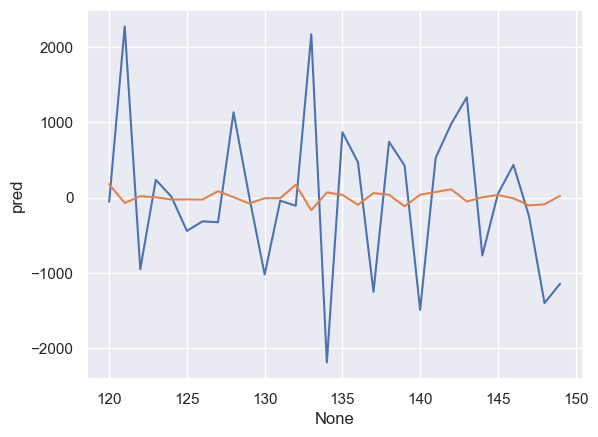

In [245]:
sns.lineplot(df_coffee_predictions,y='pred',x=df_coffee_predictions.index)
sns.lineplot(df_coffee_test,y='Difference',x=df_coffee_test.index)
plt.show()

## ARIMA

In [239]:
results_aic = pm.auto_arima(df_coffee['Quantity'], trace=True, information_criterion='aic',seasonal=True)
results_aic = pm.auto_arima(df_coffee['Quantity'], trace=True, information_criterion='bic',seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1990.048, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1973.254, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1947.687, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1988.180, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1935.648, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1937.069, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1937.139, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1935.349, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1937.156, Time=0.14 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1942.626, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.876 seconds
Performing stepwise search to minimize bic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.2